In [26]:
# imports 
import json
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
np.seterr(divide='raise', over='raise', under='raise', invalid='raise')
import pandas as pd
from pandas import Series, DataFrame
import random
import sklearn.metrics.pairwise as pw

In [27]:
def load_jsons(data_path, file):
    """ helper function to load '.json' files (they're not proper jsons) """
    file_path = data_path + file
    with open(file_path) as jsons:
        lines = [json.loads(json_line) for json_line in jsons]
    return pd.DataFrame(lines)

In [28]:
# Load data for Denver
data_path = './data/denver/'
review_file = 'review.json'
business_file = 'business.json'
user_file = 'user.json'
tip_file = 'tip.json'
checkin_file = 'checkin.json'

reviews = load_jsons(data_path, review_file)
businesses = load_jsons(data_path, business_file)
users = load_jsons(data_path, user_file)
tips = load_jsons(data_path, tip_file)
checkins = load_jsons(data_path, checkin_file)

In [29]:
display(reviews.head())
display(businesses.head())
display(users.head())
display(tips.head())
display(checkins.head())

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,ihpv-EpsP1g3AjW2Bm9d4Q,HnnbXD7dgC406zdbzrK_Ug,_KA1DfzngdobPFdoeEO51g,5.0,0,0,0,Awesome coffee !! Strong and delicious. New fa...,2018-05-08 19:45:47
1,YptSNzpVpcDTpybO05eEqQ,T4AuRPINgYyHREFfpSEzYg,EJ8RasQ8QfdjTjIB2pLpmQ,5.0,1,1,1,I had to rent a car at the last minute because...,2018-03-15 21:08:10
2,OAxshLtUb5VNa1TyW7wKpA,7xmNiO_x_l4KSRU5sDrThA,_KA1DfzngdobPFdoeEO51g,5.0,1,1,1,My husband and I thoroughly enjoy coming here....,2016-02-24 01:31:44
3,Mu0jf6dZFV0DCq2LZrePwA,54FHbrI5RSlenplrRc5Xjg,xykr9ywm-VaIbnyXeReYEg,1.0,0,0,0,Newest update: After filing my BBB claim I spo...,2017-03-16 02:30:59
4,l2VOHKh6cixCw1eyZ21-FQ,tmYjFzdqF4R4zoyEm1ZYuQ,E3wdfyZo3pyUH1LxhANmnQ,4.0,0,0,0,Good basic Chinese food. Lunch special is good...,2011-02-14 16:56:53


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6unlYN_fetLS9zjsmj73Pw,Verizon,7180 Highway 73,Denver,NC,28037,35.448931,-81.002851,1.5,3,1,None,"Internet Service Providers, Home Services, Sho...","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'..."
1,06JXcrsxH-dDeyMVz51Pqg,QC Nails & Spa,1229 N Hwy 16,Denver,NC,28037,35.476168,-80.994222,4.5,6,1,"{'BusinessParking': '{'garage': False, 'street...","Beauty & Spas, Nail Salons",None
2,-Rr4TuM1tWhagDcLTp_qUQ,Dunkin' Donuts,647 N Hwy 16,Denver,NC,28037,35.460411,-80.992598,2.0,15,1,"{'GoodForKids': 'True', 'BusinessAcceptsCredit...","Sandwiches, Restaurants, Food, Coffee & Tea, D...","{'Monday': '5:0-23:0', 'Tuesday': '5:0-23:0', ..."
3,EJ8RasQ8QfdjTjIB2pLpmQ,Enterprise Rent-A-Car,1633 N Highway 16,Denver,NC,28037,35.487106,-80.995723,4.0,5,1,None,"Hotels & Travel, Car Rental","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,E3wdfyZo3pyUH1LxhANmnQ,China II Denver,116 Hwy 16 S,Denver,NC,28037,35.446547,-80.998802,4.0,40,1,"{'BikeParking': 'False', 'RestaurantsTakeOut':...","Chinese, Restaurants",None


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,x8e1Cc1lh835Q1CpHAD0RQ,Evan,170,2014-05-25 16:03:52,188,41,84,"2016,2017,2018","ttZSRwCZiFMXwUO2Vr9pBg, sMawAvr0cs6SAGBNXFZglQ...",11,...,2,1,0,0,16,6,5,5,3,1
1,oOPGZ9iYzxsDlPxTURZmTg,Shelby,49,2014-09-20 15:33:49,30,0,4,,"rMmbv_Fbflv1ATX6PMhxyg, 3bKr6piOnw_ANlrdMr5Gpw...",0,...,1,0,0,0,0,1,0,0,1,0
2,4oIPX1n3trOkBTEBUX2kyQ,Erica,7,2016-03-24 16:29:35,12,2,2,,"u0GbbP_uOLBzF1pLDfdPkQ, 7Mk2cO_NQUMXjJFdiiXH3w...",0,...,0,0,0,0,0,0,0,0,0,0
3,JXdhEf_hg3-SMjs1Qwbtyg,Cassie,231,2011-06-08 21:27:55,231,103,96,"2016,2017,2018","vv41gJMpHLPcp8pkxRVMKw, UWK3mKjnsVOA6sGim6zfgg...",19,...,4,0,1,0,7,12,4,4,3,0
4,GGTF7hnQi6D5W77_qiKlqg,Bill,967,2014-04-05 01:44:31,15147,7947,11306,"2014,2015,2016,2017,2018","-nuCuuwUFciCSNh4GOERIw, _vwehboYKYXoGxf4IXZsBw...",436,...,20,21,6,0,172,437,385,385,168,261


,user_id,business_id,text,date,compliment_count
0,ZJlQs9hhjiVwayO6YYnNiQ,xYZFc1_UyetsGn5hqvbWSA,Go in hungry and enjoy the all you can eat sal...,2016-01-16 20:32:53,0
1,NDCKZKd9E3cv8yLIcHc5ng,ySEX_WXPLpKrmXfZOth4Bw,Make a reservation. Wait is an hour on the Thu...,2013-05-31 00:08:23,0
2,NDCKZKd9E3cv8yLIcHc5ng,DmupcPKLqSMnN0501uilGg,Vegetable spring rolls are awesome!,2013-05-31 00:06:10,0
3,DHxeGEjgafkHuJlIvvyqvQ,_Mba1YZAJQAAQJkyXSJunA,Driving Range is not open to the public.,2015-01-25 20:26:48,0
4,P_7Ceau8knJq9rEb4expEw,GLWC2uOiBgN3kl6HU98d4Q,In and out !,2018-04-01 21:54:34,0


,business_id,date
0,-3PHn7uGXNaOytVl1JnovQ,"2013-05-30 19:45:59, 2015-12-23 18:37:33, 2017..."
1,-Rr4TuM1tWhagDcLTp_qUQ,"2014-10-26 19:21:01, 2015-07-26 13:38:46, 2017..."
2,-WDEZ9zidT995DBY6psNYg,"2011-11-22 23:27:52, 2012-05-20 15:18:18, 2012..."
3,-eVgCMCS_UrMfe7LrJY20g,"2015-11-24 19:42:01, 2016-07-04 15:29:22"
4,0-ftV2vyTWXlCS9gSjRfEA,"2013-12-10 22:08:01, 2014-08-13 19:13:44, 2014..."


1.743298969072165
48.63333333333333


Text(0.5, 1.0, 'figuur 8 - top 30')

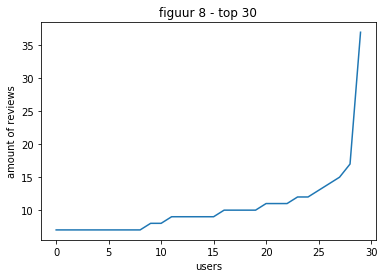

In [30]:
# PLOTS
heilig_boek = {}
for x in reviews['user_id']:
    if x in users['user_id'].values:
        if heilig_boek.get(x) != None:
            heilig_boek[x] += 1
        else:
            heilig_boek[x] = 1
heilig_boek = Series(heilig_boek)
print(heilig_boek.mean())
plt.plot(sorted(heilig_boek)[-30:])
print(sum(sorted(heilig_boek)[232:])/len(sorted(heilig_boek)[-30:]))
plt.xlabel('users')
plt.ylabel('amount of reviews')
plt.title('figuur 8 - top 30')

14.577586206896552


Text(0, 0.5, 'amount of reviews')

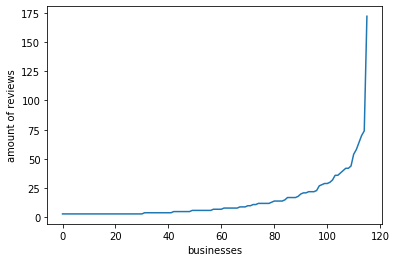

In [31]:
heilig_boek = {}
for x in reviews['business_id']:
    if heilig_boek.get(x) != None:
        heilig_boek[x] += 1
    else:
        heilig_boek[x] = 1
heilig_boek = Series(heilig_boek)
print(heilig_boek.mean())
plt.plot(sorted(heilig_boek))
plt.xlabel('businesses')
plt.ylabel('amount of reviews')

6.0
13.904347826086957


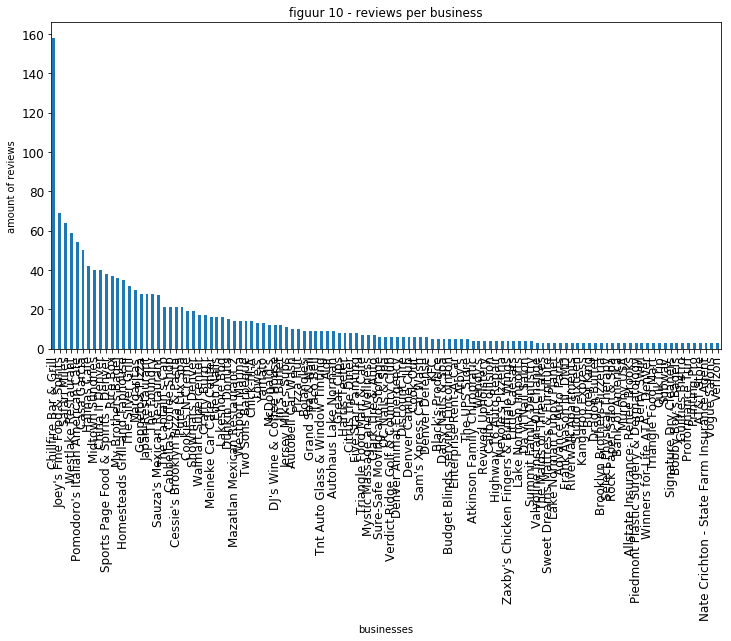

In [32]:
review_count_dict = {}
for row, columns in businesses.iterrows():
    name = businesses.loc[row, 'name']
    review_count = businesses.loc[row, 'review_count']
    review_count_dict[name] = review_count
# make a Series from the dict and plot the Series
review_count_series = pd.Series(review_count_dict)
sorted_review_count_series = review_count_series.sort_values(ascending=False)
fig, ax = plt.subplots()
plot_test = sorted_review_count_series.plot(ax=ax, kind='bar', figsize=(12,6), fontsize=12)
plot_test.set_xlabel("businesses")
plot_test.set_ylabel("amount of reviews")
plot_test.set_title("figuur 10 - reviews per business")
print(sorted_review_count_series.median())
print(sorted_review_count_series.mean())

median: 7.0
mean: 37.65979381443299


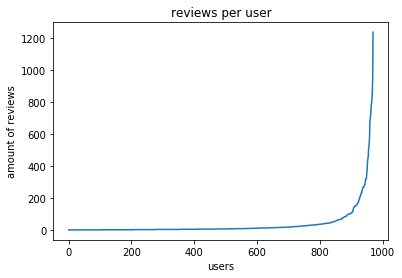

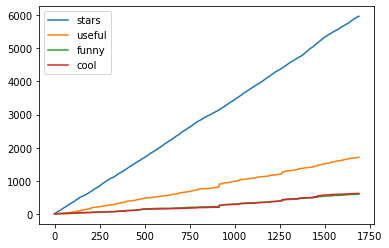

In [33]:
users1 = users['review_count']

plt.plot(sorted(list(users1)))
plt.xlabel('users')
plt.ylabel('amount of reviews')
plt.title('reviews per user')
reviews1 = reviews.cumsum()
reviews1.plot()
print("median:", users1.median())
print("mean:", users1.mean())

Text(0.5, 1.0, 'U.F.C. top 50')

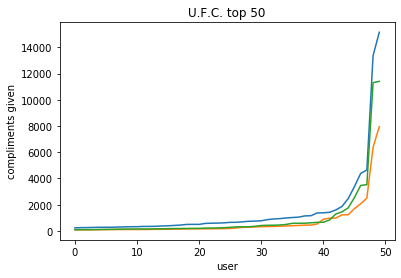

In [34]:
users1 = users['useful']
users2 = users['funny']
users3 = users['cool']

plt.plot(sorted(users1)[-50:])
plt.plot(sorted(users2)[-50:])
plt.plot(sorted(users3)[-50:])
plt.xlabel('user')
plt.ylabel('compliments given')
plt.title('U.F.C. top 50')

user_id
name
review_count
yelping_since
useful
funny
cool
elite
friends
fans
average_stars
compliment_hot
compliment_more
compliment_profile
compliment_cute
compliment_list
compliment_note
compliment_plain
compliment_cool
compliment_funny
compliment_writer
compliment_photos


Text(0.5, 1.0, 'figuur 6 - compliments top 20')

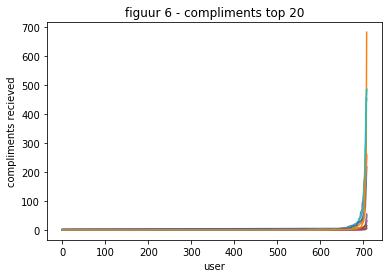

In [35]:
for i, x in enumerate(users):
    print(x)
    if i > 9:
        plt.plot(sorted(users[x])[261:])

plt.xlabel('user')
plt.ylabel('compliments recieved')
plt.title('figuur 6 - compliments top 20')

Text(0.5, 1.0, 'figuur 7 - verdeling gemiddelde ratings')

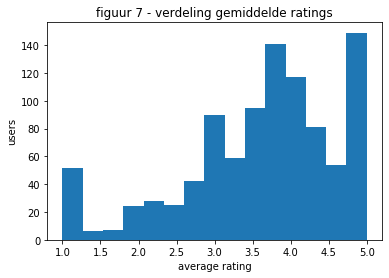

In [36]:
users1 = users['average_stars']

plt.hist(users1, bins=15, range=(1, 5))
plt.xlabel('average rating')
plt.ylabel('users')
plt.title('figuur 7 - verdeling gemiddelde ratings')

{1.5: 6, 4.5: 14, 2.0: 10, 4.0: 16, 3.0: 22, 5.0: 16, 2.5: 10, 3.5: 20, 1.0: 2}


Text(0.5, 1.0, 'figuur 8 - verdeling rating ')

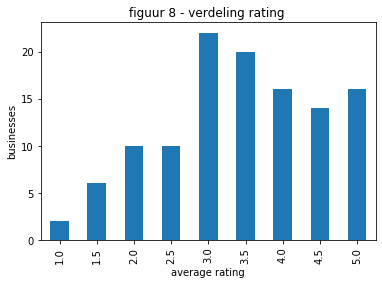

In [37]:
# PLOT: wat zijn de ratings van de bedrijven
# make a dataframe of the business data
businesses_df = pd.DataFrame(businesses)
fig, ax = plt.subplots()
dict_ratings = {}
for row, columns in businesses_df.iterrows():
    if businesses_df.loc[row, 'stars'] in dict_ratings.keys():
        dict_ratings[businesses_df.loc[row, 'stars']] += 1
    else: 
        dict_ratings[businesses_df.loc[row, 'stars']] = 1
print(dict_ratings)
businesses_rating = pd.Series(dict_ratings)
sorted_rating = businesses_rating.sort_index()
plot = sorted_rating.plot(ax=ax, kind='bar')
plot.set_xlabel("average rating")
plot.set_ylabel("businesses")
plot.set_title("figuur 8 - verdeling rating ")

Text(0.5, 1.0, 'figuur 9 - verdeling top 20 categories')

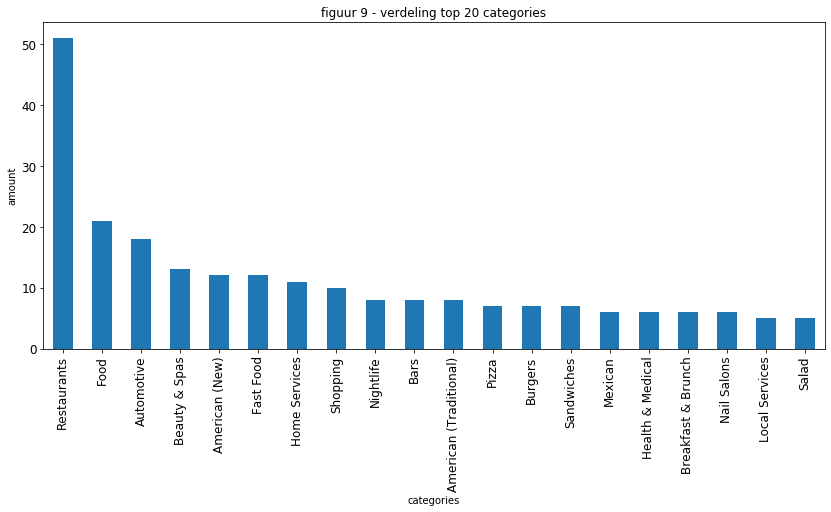

In [38]:
# PLOT: distribution categories
category_dict = {}
for row, columns in businesses_df.iterrows():
    category_string = businesses_df.loc[row, 'categories']
    categories = category_string.split(", ")
    for category in categories:
        if category in category_dict.keys():
            category_dict[category] += 1
        else:
            category_dict[category] = 1
# make a Series from the dict and plot the Series
category_series = pd.Series(category_dict)
sorted_category_series = category_series.sort_values(ascending=False)
top_20 = sorted_category_series.head(20)
fig, ax = plt.subplots()
plot = top_20.plot(ax=ax, kind='bar', figsize=(14,6), fontsize=12)
plot.set_xlabel("categories")
plot.set_ylabel("amount")
plot.set_title("figuur 9 - verdeling top 20 categories")

Text(0.5, 1.0, 'figuur 10 - reviews per business')

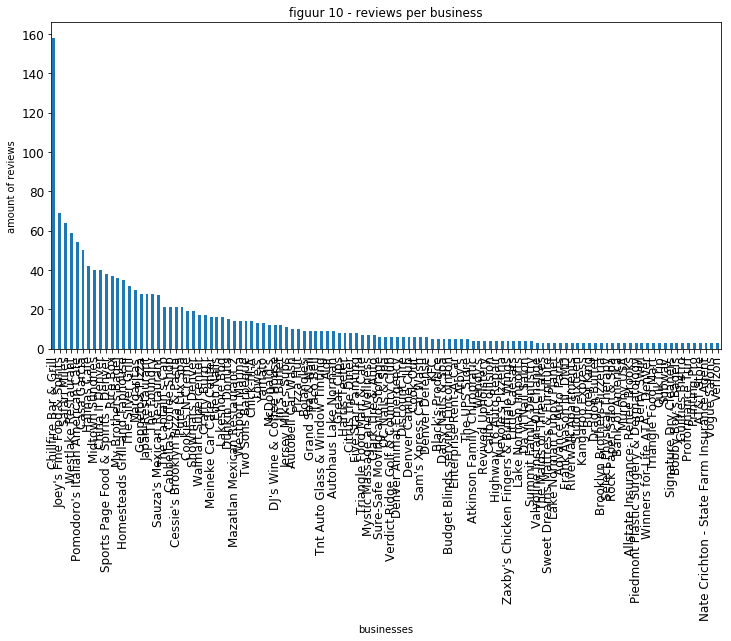

In [39]:
# PLOT: how many times were businesses reviewed
review_count_dict = {}
for row, columns in businesses.iterrows():
    name = businesses.loc[row, 'name']
    review_count = businesses.loc[row, 'review_count']
    review_count_dict[name] = review_count
# make a Series from the dict and plot the Series
review_count_series = pd.Series(review_count_dict)
sorted_review_count_series = review_count_series.sort_values(ascending=False)
fig, ax = plt.subplots()
plot_test = sorted_review_count_series.plot(ax=ax, kind='bar', figsize=(12,6), fontsize=12)
plot_test.set_xlabel("businesses")
plot_test.set_ylabel("amount of reviews")
plot_test.set_title("figuur 10 - reviews per business")

Text(0, 0.5, 'stars')

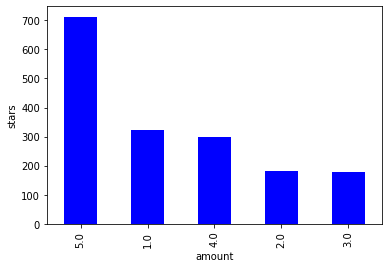

In [40]:
# PLOT: which ratings were given and how many?
fig, ax = plt.subplots() 
iets = reviews['stars'].value_counts().plot(ax=ax, kind='bar', color='blue')
iets.set_xlabel("amount")
iets.set_ylabel("stars")